# Assignment - Car Price - Multiple Linear Regression for Geely Auto
Steps :
1. Importing require libraries and packages
2. Reading ,understanding and visulaizing the data
3. Train the model
4. Residual Analysis.
5. Test the model
6. Predication, model evaulation on the test

Author : Chandrasen Wadikar

In [2]:
# 1. Importing the require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# set the seaborn style
sns.set_style("whitegrid")



C:\PY\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# 2. Reading the data

carprice = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/CarPrice_Assignment.csv")
carprice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
# Checking the shape of the data in terms of the rows and columns
carprice.shape

(205, 26)

In [7]:
# Checking whether any missing values, null present in the data
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
# 3. Visulaizing different statistics 
carprice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

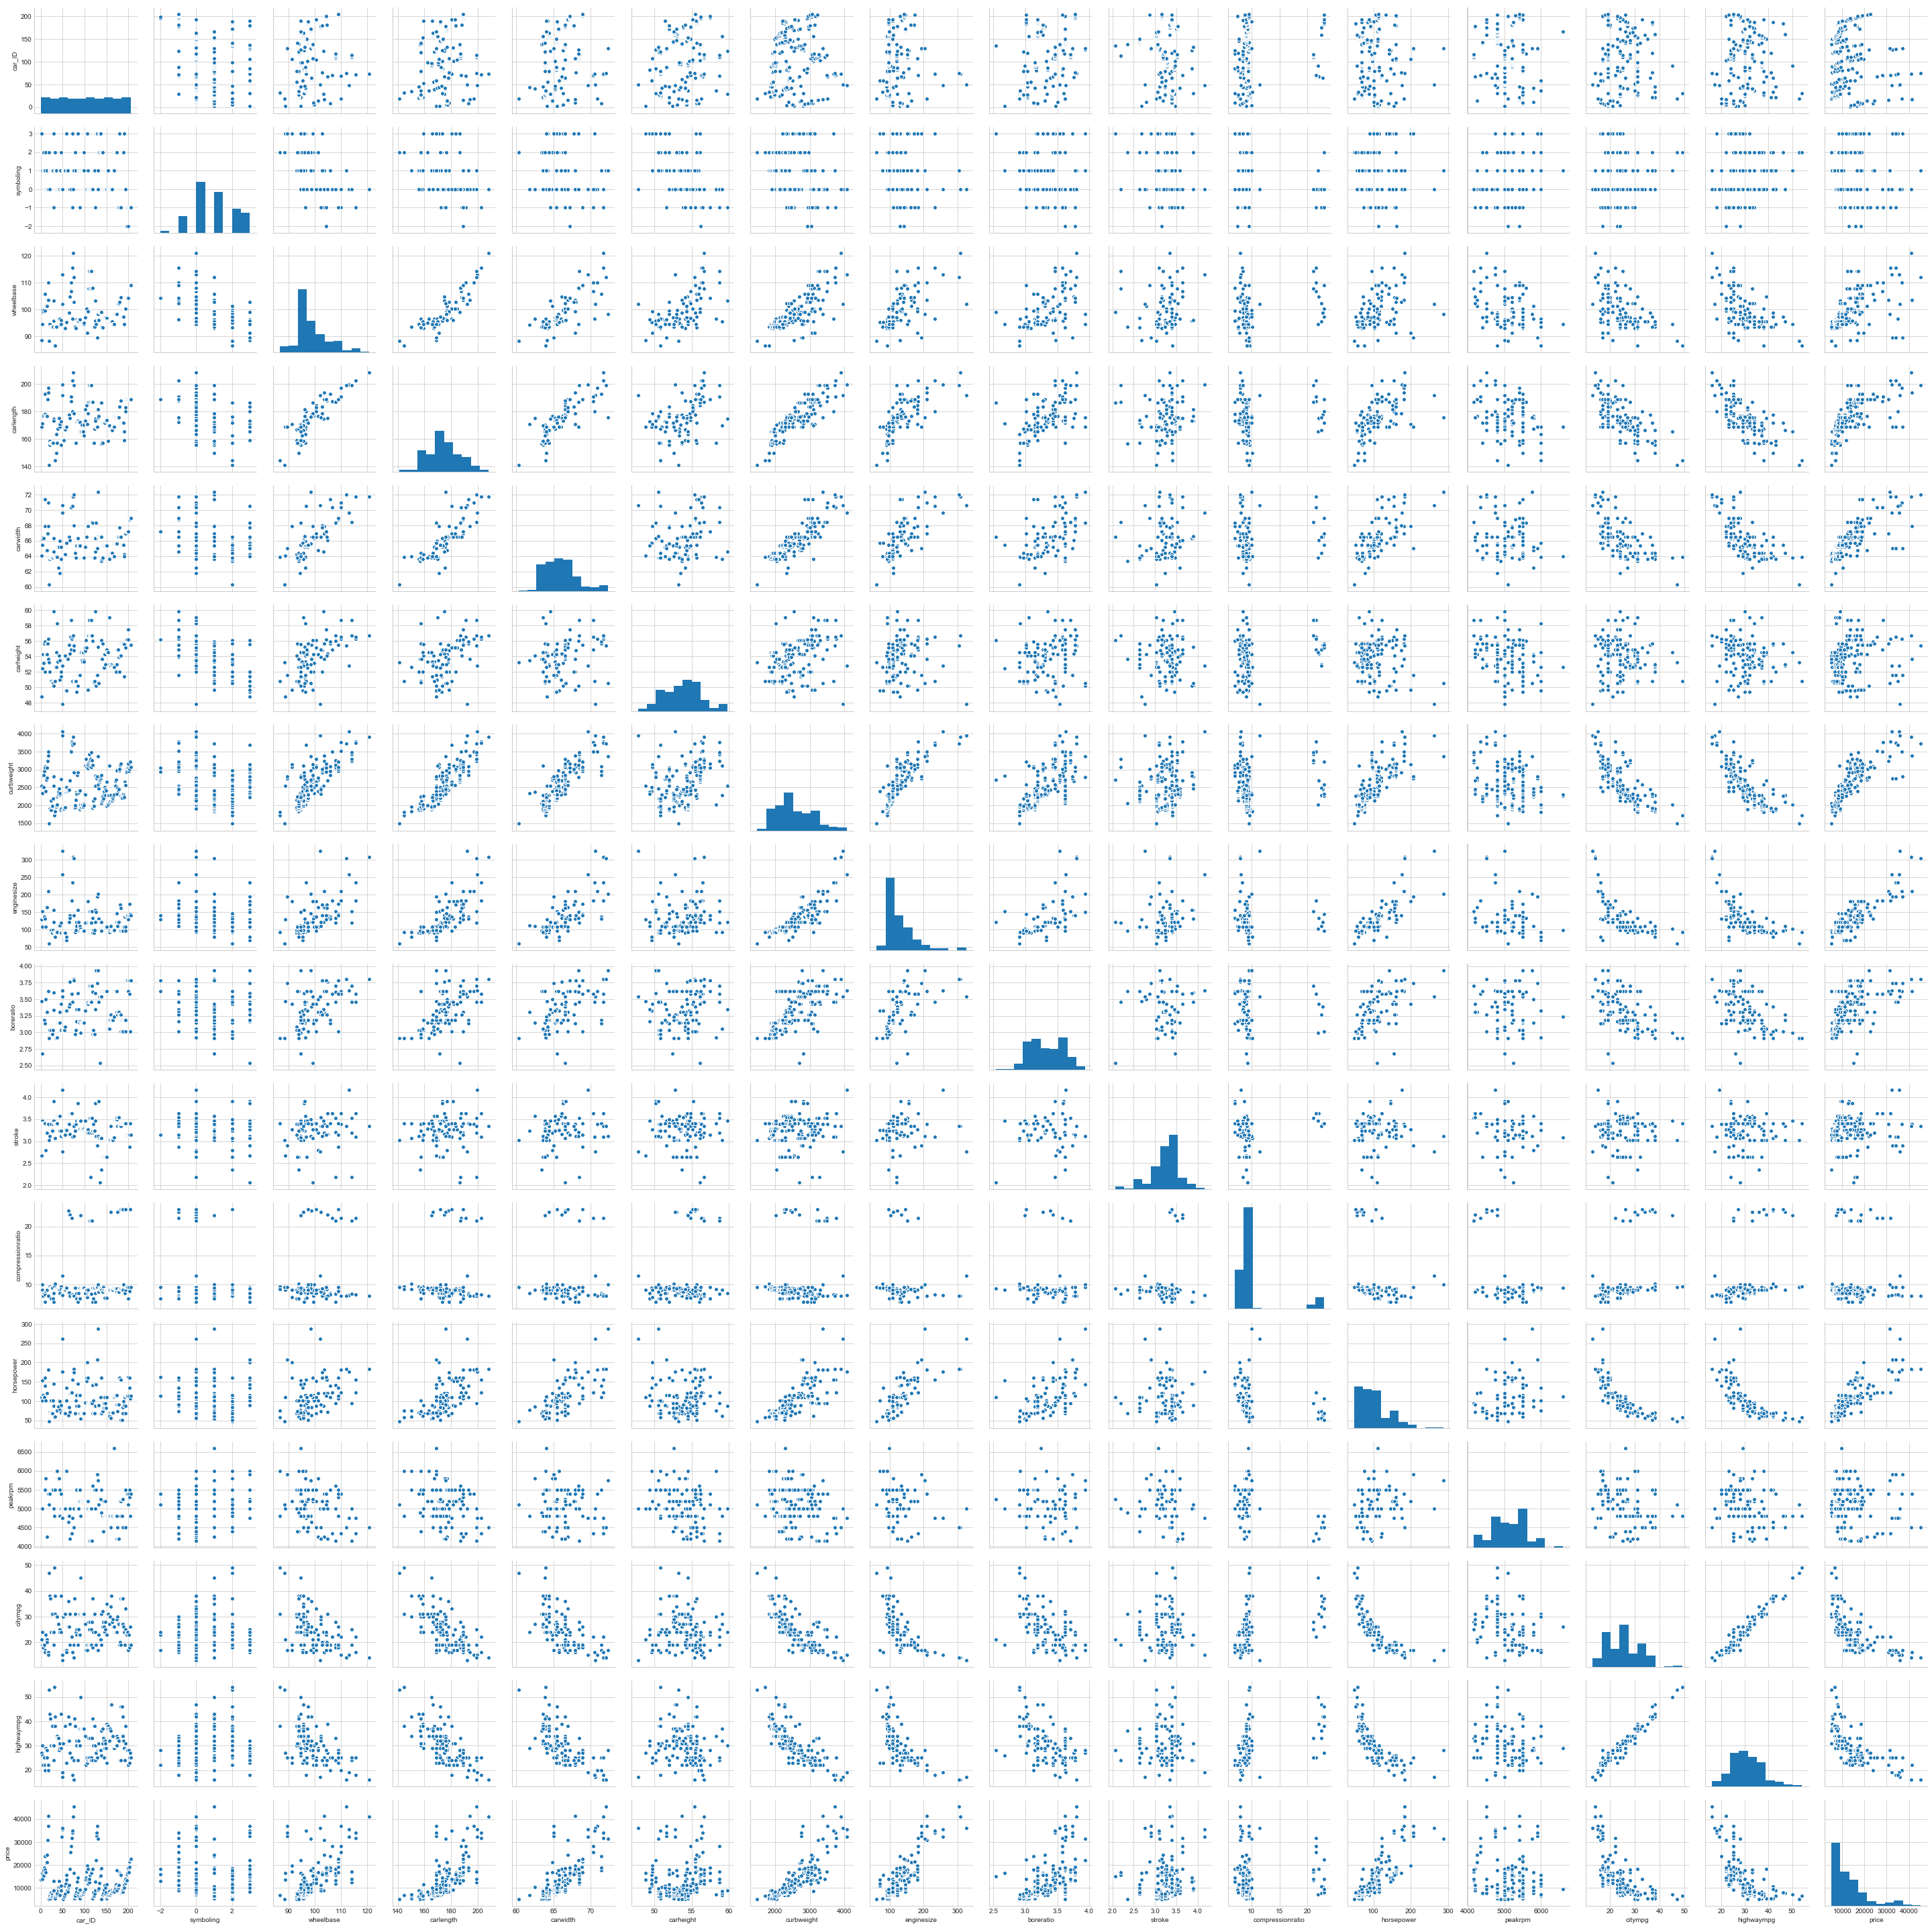

In [10]:
# Visualizing the variables
sns.pairplot(carprice)
plt.figure(figsize=(10,5))
plt.show()

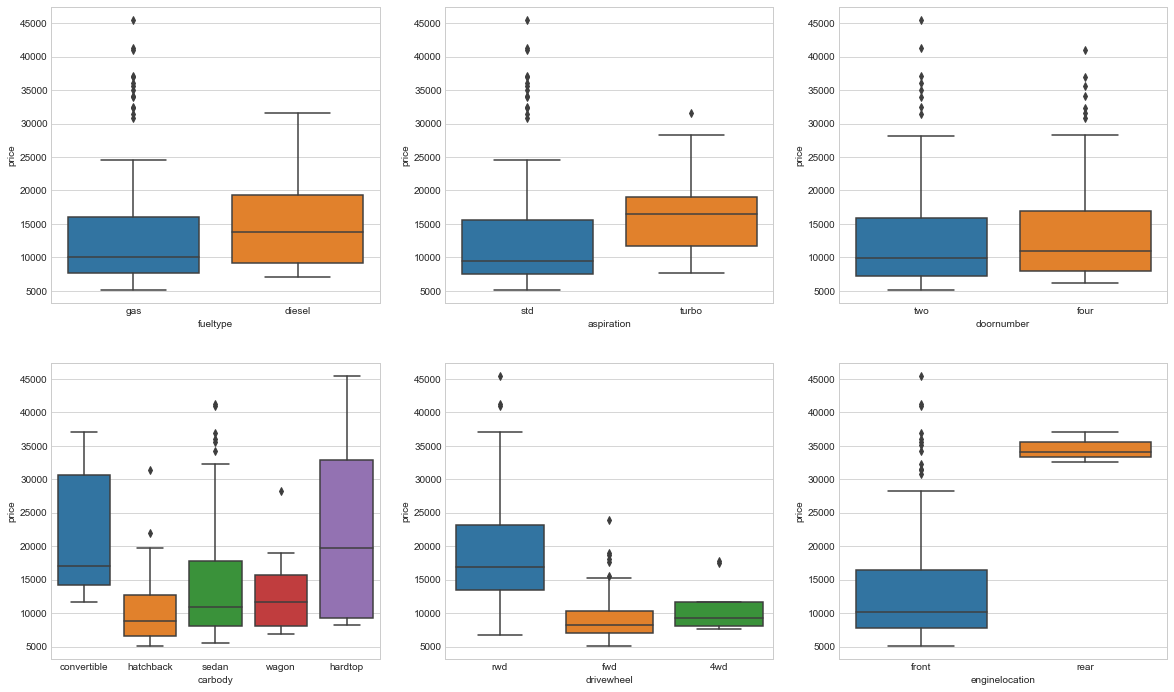

In [11]:
# Visualizing the categorical  varibales

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='fueltype',y='price', data=carprice)
plt.subplot(2,3,2)
sns.boxplot(x='aspiration',y='price', data=carprice)
plt.subplot(2,3,3)
sns.boxplot(x='doornumber',y='price', data=carprice)
plt.subplot(2,3,4)
sns.boxplot(x='carbody',y='price', data=carprice)
plt.subplot(2,3,5)
sns.boxplot(x='drivewheel',y='price', data=carprice)
plt.subplot(2,3,6)
sns.boxplot(x='enginelocation',y='price', data=carprice)
#plt.subplot(2,3,7)
#sns.boxplot(x='enginetype',y='price', data=carprice)
#plt.subplot(2,3,8)
#sns.boxplot(x='cylindernumber',y='price', data=carprice)
#plt.subplot(2,3,9)
#sns.boxplot(x='fuelsystem',y='price', data=carprice)
plt.show()

In [12]:
carprice.CarName


0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [13]:
carprice.CarName.str.split(expand = True,)

0             1         2      3     4
0    alfa-romero        giulia      None   None  None
1    alfa-romero       stelvio      None   None  None
2    alfa-romero  Quadrifoglio      None   None  None
3           audi           100        ls   None  None
4           audi         100ls      None   None  None
5           audi           fox      None   None  None
6           audi         100ls      None   None  None
7           audi          5000      None   None  None
8           audi          4000      None   None  None
9           audi         5000s  (diesel)   None  None
10           bmw          320i      None   None  None
11           bmw          320i      None   None  None
12           bmw            x1      None   None  None
13           bmw            x3      None   None  None
14           bmw            z4      None   None  None
15           bmw            x4      None   None  None
16           bmw            x5      None   None  None
17           bmw            x3      None   None  None
18     chevrolet        impala      None   None  None
19     chevrolet         monte     carlo   None  None
20     chevrolet          vega      2300   None  None
21         dodge       rampage      None   None  None
22         dodge    challenger        se   None  None
23         dodge          d200      None   None  None
24         dodge        monaco      (sw)   None  None
25         dodge          colt   hardtop   None  None
26         dodge          colt      (sw)   None  None
27         dodge       coronet    custom   None  None
28         dodge          dart    custom   None  None
29         dodge       coronet    custom   (sw)  None
..           ...           ...       ...    ...   ...
175       toyota        corona      None   None  None
176       toyota       corolla      None   None  None
177       toyota          mark        ii   None  None
178       toyota       corolla  liftback   None  None
179       toyota        corona      None   None  None
180       toyota       starlet      None   None  None
181      toyouta        tercel      None   None  None
182    vokswagen        rabbit      None   None  None
183   volkswagen          1131    deluxe  sedan  None
184   volkswagen         model       111   None  None
185   volkswagen          type         3   None  None
186   volkswagen           411      (sw)   None  None
187   volkswagen         super    beetle   None  None
188   volkswagen        dasher      None   None  None
189           vw        dasher      None   None  None
190           vw        rabbit      None   None  None
191   volkswagen        rabbit      None   None  None
192   volkswagen        rabbit    custom   None  None
193   volkswagen        dasher      None   None  None
194        volvo          145e      (sw)   None  None
195        volvo         144ea      None   None  None
196        volvo         244dl      None   None  None
197        volvo           245      None   None  None
198        volvo         264gl      None   None  None
199        volvo        diesel      None   None  None
200        volvo          145e      (sw)   None  None
201        volvo         144ea      None   None  None
202        volvo         244dl      None   None  None
203        volvo           246      None   None  None
204        volvo         264gl      None   None  None

[205 rows x 5 columns]

In [14]:
# Introducing new column for Car Company Name

df=pd.DataFrame({'CompanyName' :["alfa","audi","bmw","chevrolet","dodge","honda","isuzu","jaguar","maxda","mazda","buick","mercury","mitsubishi","Nissan","nissan","peugeot","plymouth","porsche","renault","saab","subaru","toyota","toyouta","volkswagen","vw","volvo"]})
df

carprice = pd.concat([carprice,df],axis=1)
carprice.head()



car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase     ...       fuelsystem  \
0  convertible        rwd          front       88.6     ...             mpfi   
1  convertible        rwd          front       88.6     ...             mpfi   
2    hatchback        rwd          front       94.5     ...             mpfi   
3        sedan        fwd          front       99.8     ...             mpfi   
4        sedan        4wd          front       99.4     ...             mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price  CompanyName  
0  13495.0         alfa  
1  16500.0         audi  
2  16500.0          bmw  
3  13950.0    chevrolet  
4  17450.0        dodge  

[5 rows x 27 columns]

In [16]:
# Apply dummy variables for Car Company Name
status1 = pd.get_dummies(carprice['CompanyName'])
status1.head()

Nissan  alfa  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar ...  \
0       0     1     0    0      0          0      0      0      0       0 ...   
1       0     0     1    0      0          0      0      0      0       0 ...   
2       0     0     0    1      0          0      0      0      0       0 ...   
3       0     0     0    0      0          1      0      0      0       0 ...   
4       0     0     0    0      0          0      1      0      0       0 ...   

   plymouth  porsche  renault  saab  subaru  toyota  toyouta  volkswagen  \
0         0        0        0     0       0       0        0           0   
1         0        0        0     0       0       0        0           0   
2         0        0        0     0       0       0        0           0   
3         0        0        0     0       0       0        0           0   
4         0        0        0     0       0       0        0           0   

   volvo  vw  
0      0   0  
1      0   0  
2      0   0  
3      0   0  
4      0   0  

[5 rows x 26 columns]

In [17]:
# Concatentating with Orignial DataSet
carprice = pd.concat([carprice,status1],axis=1)
carprice.head()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase ...  plymouth  porsche  \
0  convertible        rwd          front       88.6 ...         0        0   
1  convertible        rwd          front       88.6 ...         0        0   
2    hatchback        rwd          front       94.5 ...         0        0   
3        sedan        fwd          front       99.8 ...         0        0   
4        sedan        4wd          front       99.4 ...         0        0   

   renault  saab subaru toyota  toyouta volkswagen  volvo  vw  
0        0     0      0      0        0          0      0   0  
1        0     0      0      0        0          0      0   0  
2        0     0      0      0        0          0      0   0  
3        0     0      0      0        0          0      0   0  
4        0     0      0      0        0          0      0   0  

[5 rows x 53 columns]

In [18]:
carprice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase ...  plymouth  porsche  \
0  convertible        rwd          front       88.6 ...         0        0   
1  convertible        rwd          front       88.6 ...         0        0   
2    hatchback        rwd          front       94.5 ...         0        0   
3        sedan        fwd          front       99.8 ...         0        0   
4        sedan        4wd          front       99.4 ...         0        0   

   renault  saab subaru toyota  toyouta volkswagen  volvo  vw  
0        0     0      0      0        0          0      0   0  
1        0     0      0      0        0          0      0   0  
2        0     0      0      0        0          0      0   0  
3        0     0      0      0        0          0      0   0  
4        0     0      0      0        0          0      0   0  

[5 rows x 53 columns]

In [19]:
# Checking the shape of the dataset
carprice.shape

(205, 53)

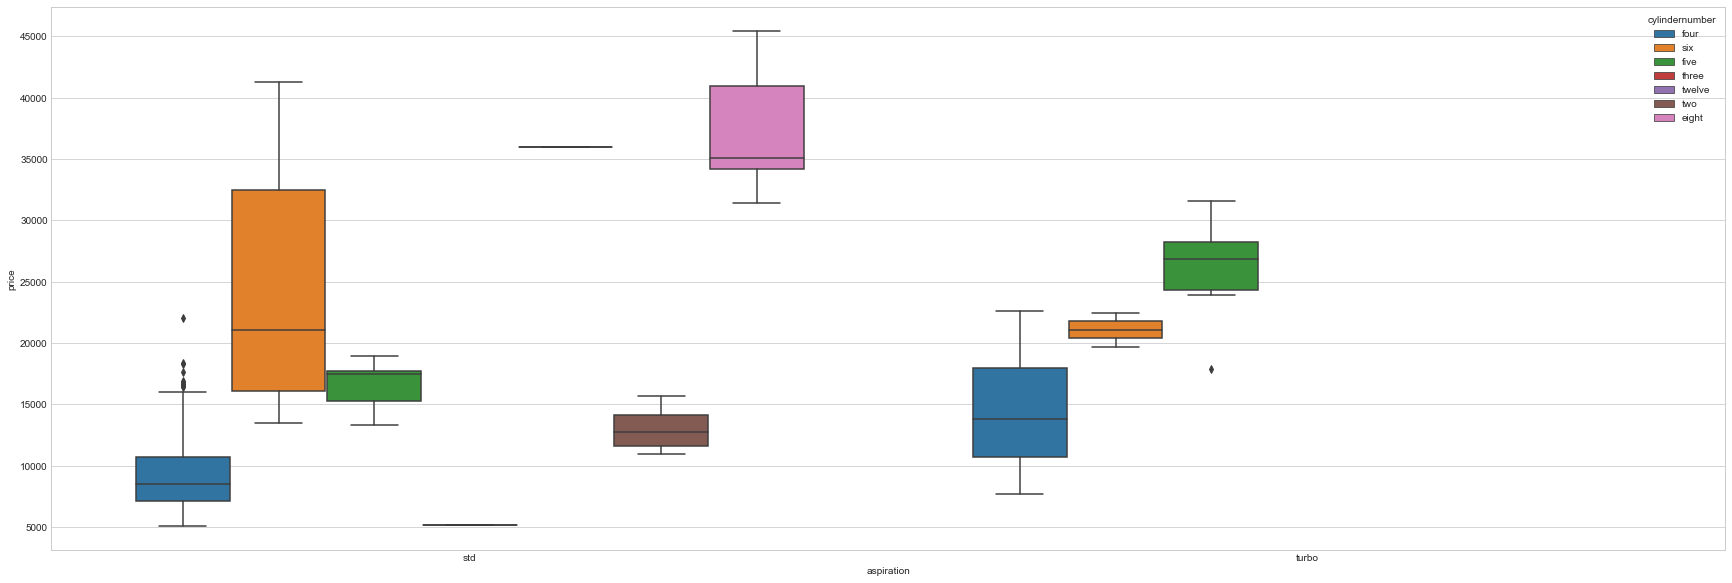

In [20]:
# Plotting boxplot to check the defined variables and significance with respect to different statistical points.
plt.figure(figsize=(30,10))
sns.boxplot(x = 'aspiration', y='price',hue ='cylindernumber',data =carprice)
plt.show()

In [21]:
 #Visualizing the data
sns.pairplot(carprice)
plt.figure(figsize=(10,5))
plt.show()

 # Data Preparation
 # First check all categorical variables and the count for the same.


In [22]:
carprice.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [23]:
carprice.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [24]:
carprice.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [25]:
carprice.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [26]:
carprice.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [27]:
carprice.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [28]:
carprice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

# Converting all require categorical variables into contineous variables

In [29]:


varlist =['fueltype']
carprice[varlist] = carprice[varlist].apply(lambda X: X.map({'gas':1,'diesel':0})) # subsetting /converting categorical into numeric
carprice[varlist]

fueltype
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
..        ...
175         1
176         1
177         1
178         1
179         1
180         1
181         1
182         0
183         1
184         0
185         1
186         1
187         0
188         1
189         1
190         1
191         1
192         0
193         1
194         1
195         1
196         1
197         1
198         1
199         1
200         1
201         1
202         1
203         0
204         1

[205 rows x 1 columns]

In [31]:
carprice.head()

car_ID  symboling                   CarName  fueltype aspiration  \
0       1          3        alfa-romero giulia         1        std   
1       2          3       alfa-romero stelvio         1        std   
2       3          1  alfa-romero Quadrifoglio         1        std   
3       4          2               audi 100 ls         1        std   
4       5          2                audi 100ls         1        std   

  doornumber      carbody drivewheel enginelocation  wheelbase ...  plymouth  \
0        two  convertible        rwd          front       88.6 ...         0   
1        two  convertible        rwd          front       88.6 ...         0   
2        two    hatchback        rwd          front       94.5 ...         0   
3       four        sedan        fwd          front       99.8 ...         0   
4       four        sedan        4wd          front       99.4 ...         0   

   porsche  renault  saab subaru toyota  toyouta volkswagen  volvo  vw  
0        0        0     0      0      0        0          0      0   0  
1        0        0     0      0      0        0          0      0   0  
2        0        0     0      0      0        0          0      0   0  
3        0        0     0      0      0        0          0      0   0  
4        0        0     0      0      0        0          0      0   0  

[5 rows x 53 columns]

In [32]:
varlist1 =['aspiration']
carprice[varlist1] = carprice[varlist1].apply(lambda X: X.map({'std':1,'turbo':0})) # subsetting /converting categorical into numeric
carprice[varlist1]

aspiration
0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             0
9             0
10            1
11            1
12            1
13            1
14            1
15            1
16            1
17            1
18            1
19            1
20            1
21            1
22            1
23            0
24            1
25            1
26            1
27            0
28            1
29            0
..          ...
175           1
176           1
177           1
178           1
179           1
180           1
181           1
182           1
183           1
184           1
185           1
186           1
187           0
188           1
189           1
190           1
191           1
192           0
193           1
194           1
195           1
196           1
197           1
198           0
199           0
200           1
201           0
202           1
203           0
204           0

[205 rows x 1 columns]

In [33]:
carprice.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           1   
1       2          3       alfa-romero stelvio         1           1   
2       3          1  alfa-romero Quadrifoglio         1           1   
3       4          2               audi 100 ls         1           1   
4       5          2                audi 100ls         1           1   

  doornumber      carbody drivewheel enginelocation  wheelbase ...  plymouth  \
0        two  convertible        rwd          front       88.6 ...         0   
1        two  convertible        rwd          front       88.6 ...         0   
2        two    hatchback        rwd          front       94.5 ...         0   
3       four        sedan        fwd          front       99.8 ...         0   
4       four        sedan        4wd          front       99.4 ...         0   

   porsche  renault  saab subaru toyota  toyouta volkswagen  volvo  vw  
0        0        0     0      0      0        0          0      0   0  
1        0        0     0      0      0        0          0      0   0  
2        0        0     0      0      0        0          0      0   0  
3        0        0     0      0      0        0          0      0   0  
4        0        0     0      0      0        0          0      0   0  

[5 rows x 53 columns]

In [34]:
varlist2 =['doornumber']
carprice[varlist2] = carprice[varlist2].apply(lambda X: X.map({'two':2,'four':4})) # subsetting /converting categorical into numeric
carprice[varlist2]

doornumber
0             2
1             2
2             2
3             4
4             4
5             2
6             4
7             4
8             4
9             2
10            2
11            4
12            2
13            4
14            4
15            4
16            2
17            4
18            2
19            2
20            4
21            2
22            2
23            2
24            4
25            4
26            4
27            2
28            4
29            2
..          ...
175           4
176           4
177           4
178           2
179           2
180           4
181           4
182           2
183           2
184           4
185           4
186           4
187           4
188           4
189           2
190           2
191           4
192           4
193           4
194           4
195           4
196           4
197           4
198           4
199           4
200           4
201           4
202           4
203           4
204           4

[205 rows x 1 columns]

In [35]:
varlist3 =['enginelocation']
carprice[varlist3] = carprice[varlist3].apply(lambda X: X.map({'front':1,'rear':0})) # subsetting /converting categorical into numeric
carprice[varlist3]

enginelocation
0                 1
1                 1
2                 1
3                 1
4                 1
5                 1
6                 1
7                 1
8                 1
9                 1
10                1
11                1
12                1
13                1
14                1
15                1
16                1
17                1
18                1
19                1
20                1
21                1
22                1
23                1
24                1
25                1
26                1
27                1
28                1
29                1
..              ...
175               1
176               1
177               1
178               1
179               1
180               1
181               1
182               1
183               1
184               1
185               1
186               1
187               1
188               1
189               1
190               1
191               1
192               1
193               1
194               1
195               1
196               1
197               1
198               1
199               1
200               1
201               1
202               1
203               1
204               1

[205 rows x 1 columns]

In [36]:
varlist4 =['cylindernumber']
carprice[varlist4] = carprice[varlist4].apply(lambda X: X.map({'eight':8,'five':5,'four':4,'six':6,'three':3,'twelve':12,'two':2})) # subsetting /converting categorical into numeric
carprice[varlist4]

cylindernumber
0                 4
1                 4
2                 6
3                 4
4                 5
5                 5
6                 5
7                 5
8                 5
9                 5
10                4
11                4
12                6
13                6
14                6
15                6
16                6
17                6
18                3
19                4
20                4
21                4
22                4
23                4
24                4
25                4
26                4
27                4
28                4
29                4
..              ...
175               4
176               4
177               4
178               6
179               6
180               6
181               6
182               4
183               4
184               4
185               4
186               4
187               4
188               4
189               4
190               4
191               5
192               4
193               4
194               4
195               4
196               4
197               4
198               4
199               4
200               4
201               4
202               6
203               6
204               4

[205 rows x 1 columns]

In [37]:
# Checking whether all require categorical variables are converted into nummeric or not 
carprice.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           1   
1       2          3       alfa-romero stelvio         1           1   
2       3          1  alfa-romero Quadrifoglio         1           1   
3       4          2               audi 100 ls         1           1   
4       5          2                audi 100ls         1           1   

   doornumber      carbody drivewheel  enginelocation  wheelbase ...  \
0           2  convertible        rwd               1       88.6 ...   
1           2  convertible        rwd               1       88.6 ...   
2           2    hatchback        rwd               1       94.5 ...   
3           4        sedan        fwd               1       99.8 ...   
4           4        sedan        4wd               1       99.4 ...   

   plymouth  porsche  renault  saab subaru  toyota  toyouta volkswagen  volvo  \
0         0        0        0     0      0       0        0          0      0   
1         0        0        0     0      0       0        0          0      0   
2         0        0        0     0      0       0        0          0      0   
3         0        0        0     0      0       0        0          0      0   
4         0        0        0     0      0       0        0          0      0   

   vw  
0   0  
1   0  
2   0  
3   0  
4   0  

[5 rows x 53 columns]

# Dummy Variables

In [38]:
# Creating Dummy variables for Drivewbeel

status = pd.get_dummies(carprice['drivewheel'])
status.head()

4wd  fwd  rwd
0    0    0    1
1    0    0    1
2    0    0    1
3    0    1    0
4    1    0    0

In [39]:
# Dropping redundant dummy variables
status = pd.get_dummies(carprice['drivewheel'],drop_first=True)
status.head()

fwd  rwd
0    0    1
1    0    1
2    0    1
3    1    0
4    0    0

In [40]:
# Concat the dummy data frame to orignial data

carprice = pd.concat([carprice,status],axis=1)
carprice.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           1   
1       2          3       alfa-romero stelvio         1           1   
2       3          1  alfa-romero Quadrifoglio         1           1   
3       4          2               audi 100 ls         1           1   
4       5          2                audi 100ls         1           1   

   doornumber      carbody drivewheel  enginelocation  wheelbase ...   \
0           2  convertible        rwd               1       88.6 ...    
1           2  convertible        rwd               1       88.6 ...    
2           2    hatchback        rwd               1       94.5 ...    
3           4        sedan        fwd               1       99.8 ...    
4           4        sedan        4wd               1       99.4 ...    

   renault  saab  subaru  toyota toyouta  volkswagen  volvo vw  fwd  rwd  
0        0     0       0       0       0           0      0  0    0    1  
1        0     0       0       0       0           0      0  0    0    1  
2        0     0       0       0       0           0      0  0    0    1  
3        0     0       0       0       0           0      0  0    1    0  
4        0     0       0       0       0           0      0  0    0    0  

[5 rows x 55 columns]

In [41]:
carprice = carprice.drop('drivewheel',axis=1)
carprice.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           1   
1       2          3       alfa-romero stelvio         1           1   
2       3          1  alfa-romero Quadrifoglio         1           1   
3       4          2               audi 100 ls         1           1   
4       5          2                audi 100ls         1           1   

   doornumber      carbody  enginelocation  wheelbase  carlength ...   \
0           2  convertible               1       88.6      168.8 ...    
1           2  convertible               1       88.6      168.8 ...    
2           2    hatchback               1       94.5      171.2 ...    
3           4        sedan               1       99.8      176.6 ...    
4           4        sedan               1       99.4      176.6 ...    

   renault  saab  subaru toyota  toyouta  volkswagen volvo  vw  fwd  rwd  
0        0     0       0      0        0           0     0   0    0    1  
1        0     0       0      0        0           0     0   0    0    1  
2        0     0       0      0        0           0     0   0    0    1  
3        0     0       0      0        0           0     0   0    1    0  
4        0     0       0      0        0           0     0   0    0    0  

[5 rows x 54 columns]

# 3. Spliting the data into Training and Testing sets


In [42]:
np.random.seed(0)
df_train,df_test = train_test_split(carprice, train_size=0.7,test_size=0.3,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(143, 54)
(62, 54)


In [43]:
carprice.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           1   
1       2          3       alfa-romero stelvio         1           1   
2       3          1  alfa-romero Quadrifoglio         1           1   
3       4          2               audi 100 ls         1           1   
4       5          2                audi 100ls         1           1   

   doornumber      carbody  enginelocation  wheelbase  carlength ...   \
0           2  convertible               1       88.6      168.8 ...    
1           2  convertible               1       88.6      168.8 ...    
2           2    hatchback               1       94.5      171.2 ...    
3           4        sedan               1       99.8      176.6 ...    
4           4        sedan               1       99.4      176.6 ...    

   renault  saab  subaru toyota  toyouta  volkswagen volvo  vw  fwd  rwd  
0        0     0       0      0        0           0     0   0    0    1  
1        0     0       0      0        0           0     0   0    0    1  
2        0     0       0      0        0           0     0   0    0    1  
3        0     0       0      0        0           0     0   0    1    0  
4        0     0       0      0        0           0     0   0    0    0  

[5 rows x 54 columns]

# Rescaling the features 


In [44]:
scaler = MinMaxScaler()

# Create a list of numeric variables 

num_vars = ['symboling','fueltype','aspiration','doornumber','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower','cylindernumber','peakrpm','citympg','highwaympg','renault','saab',
            'subaru','toyota','toyouta','volkswagen','volvo','vw','fwd','rwd','price']

# Fit on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
122     123        0.6  plymouth fury gran sedan       1.0         1.0   
125     126        1.0             porsche macan       1.0         1.0   
166     167        0.6     toyota corolla tercel       1.0         1.0   
1         2        1.0       alfa-romero stelvio       1.0         1.0   
199     200        0.2              volvo diesel       1.0         0.0   

     doornumber      carbody  enginelocation  wheelbase  carlength ...   \
122         1.0        sedan             1.0   0.244828   0.426016 ...    
125         0.0    hatchback             1.0   0.272414   0.452033 ...    
166         0.0    hatchback             1.0   0.272414   0.448780 ...    
1           0.0  convertible             1.0   0.068966   0.450407 ...    
199         1.0        wagon             1.0   0.610345   0.775610 ...    

     renault  saab  subaru toyota  toyouta  volkswagen volvo   vw  fwd  rwd  
122      0.0   0.0     0.0    0.0      0.0         0.0   0.0  0.0  1.0  0.0  
125      0.0   0.0     0.0    0.0      0.0         0.0   0.0  0.0  0.0  1.0  
166      0.0   0.0     0.0    0.0      0.0         0.0   0.0  0.0  0.0  1.0  
1        0.0   0.0     0.0    0.0      0.0         0.0   0.0  0.0  0.0  1.0  
199      0.0   0.0     0.0    0.0      0.0         0.0   0.0  0.0  0.0  1.0  

[5 rows x 54 columns]

In [45]:
df_train[num_vars].describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  143.000000  143.000000  143.000000  143.000000      143.000000   
mean     0.559441    0.909091    0.818182    0.559441        0.993007   
std      0.239200    0.288490    0.387050    0.498199        0.083624   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.400000    1.000000    1.000000    0.000000        1.000000   
50%      0.600000    1.000000    1.000000    1.000000        1.000000   
75%      0.600000    1.000000    1.000000    1.000000        1.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

        wheelbase   carlength    carwidth   carheight  curbweight     ...      \
count  143.000000  143.000000  143.000000  143.000000  143.000000     ...       
mean     0.411141    0.525476    0.461655    0.509004    0.407878     ...       
std      0.205581    0.204848    0.184517    0.215378    0.211269     ...       
min      0.000000    0.000000    0.000000    0.000000    0.000000     ...       
25%      0.272414    0.399187    0.304167    0.353982    0.245539     ...       
50%      0.341379    0.502439    0.425000    0.522124    0.355702     ...       
75%      0.503448    0.669919    0.550000    0.668142    0.559542     ...       
max      1.000000    1.000000    1.000000    1.000000    1.000000     ...       

             saab      subaru      toyota     toyouta  volkswagen       volvo  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.006993    0.006993    0.006993    0.006993    0.006993    0.006993   
std      0.083624    0.083624    0.083624    0.083624    0.083624    0.083624   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               vw         fwd         rwd       price  
count  143.000000  143.000000  143.000000  143.000000  
mean     0.006993    0.594406    0.349650    0.219310  
std      0.083624    0.492733    0.478536    0.215682  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.067298  
50%      0.000000    1.000000    0.000000    0.140343  
75%      0.000000    1.000000    1.000000    0.313479  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

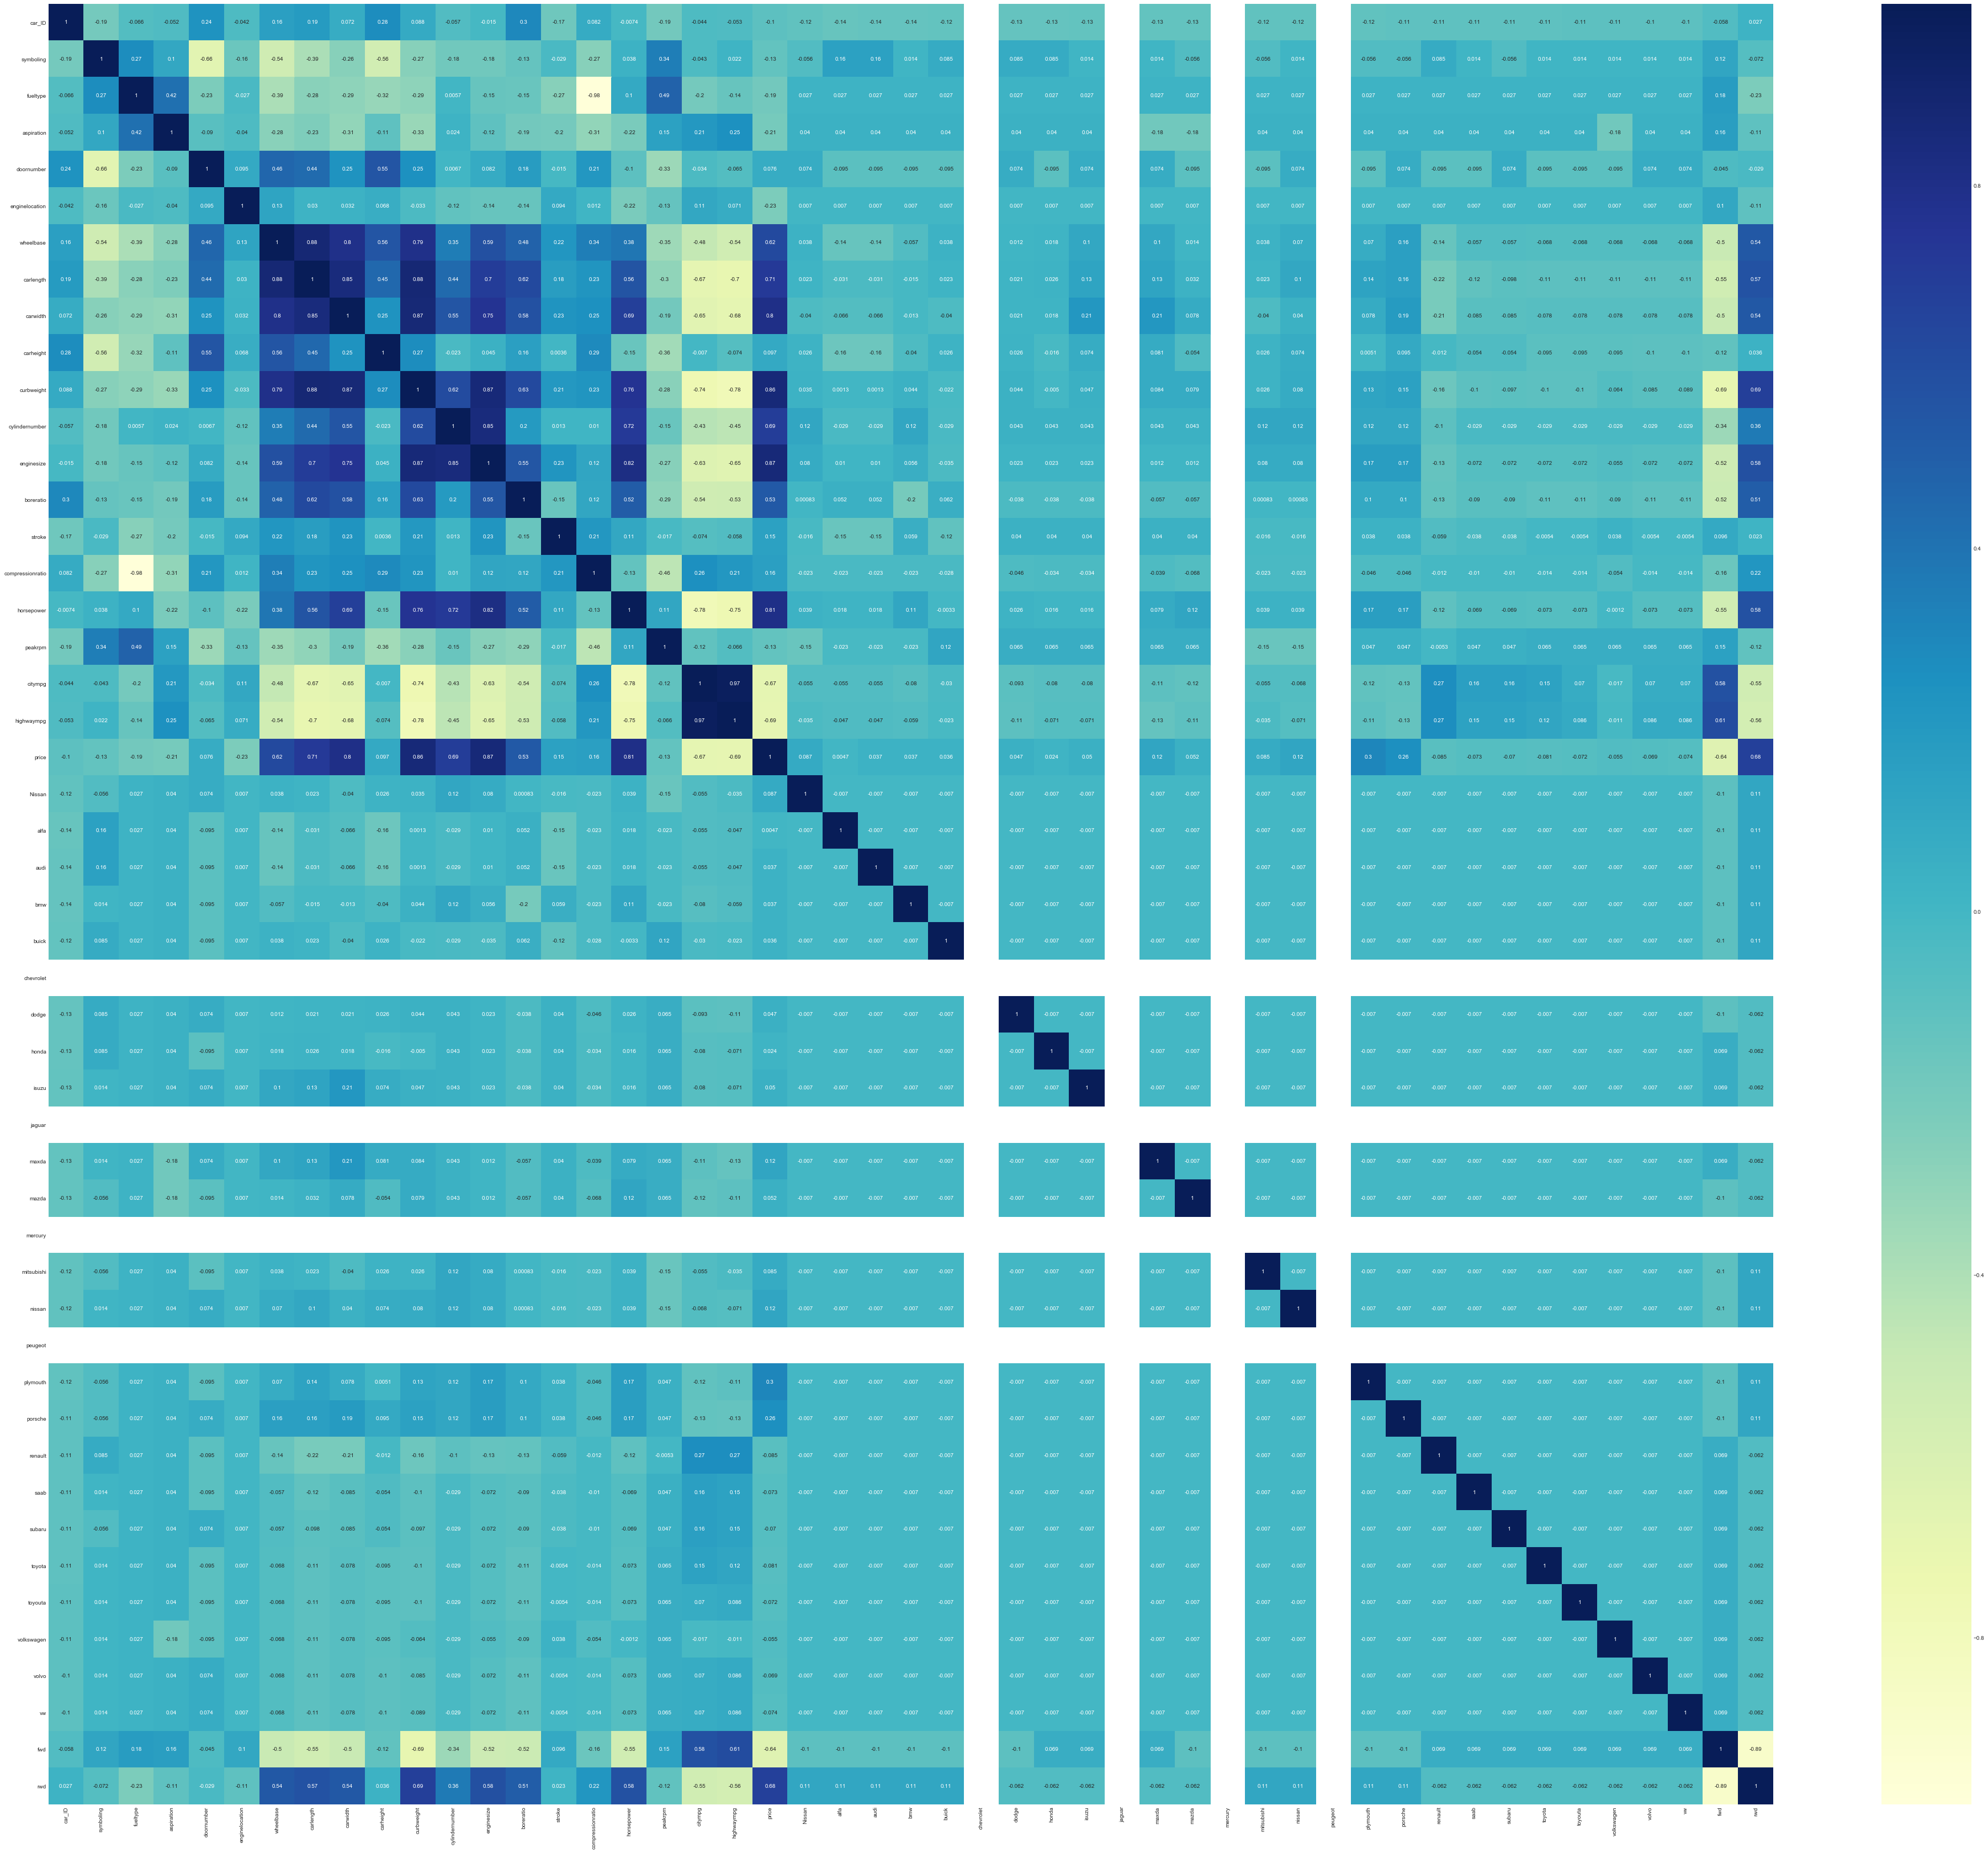

In [46]:
# Check the corelation coefficient to see which variables are highly corelated 

plt.figure(figsize=(70,60))
sns.heatmap(df_train.corr(),annot = True, cmap ="YlGnBu")
plt.show()

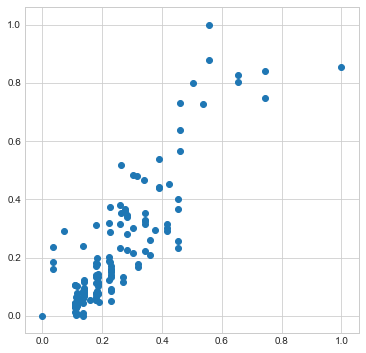

In [47]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

 # Dividing into X and Y sets for the model building 


In [48]:
y_train = df_train.pop('price')
X_train = df_train

In [49]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

# Building a linear model

In [50]:
# Add a constant

X_train_lm = sm.add_constant(X_train[['enginesize']])

# create a first fitted model

lr = sm.OLS(y_train,X_train_lm).fit()

In [51]:
# check the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

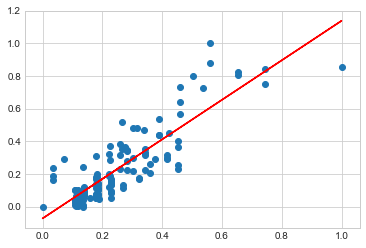

In [52]:
# Visualize the data with a scatter plot and fitted regression line

plt.scatter(X_train_lm.iloc[:,1],y_train)
plt.plot(X_train_lm.iloc[:,1],-0.072+1.210*X_train_lm.iloc[:,1],'r')
plt.show()

In [53]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           1.09e-44
Time:                        21:06:44   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

In [54]:
# adding another variable

X_train_sm = X_train[['curbweight','carwidth','enginesize']]
X_train_sm = sm.add_constant(X_train_sm)

# Create a  model

lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

# params
lr_model.params

const        -0.162850
curbweight    0.273313
carwidth      0.231172
enginesize    0.679341
dtype: float64

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           3.66e-50
Time:                        21:06:51   Log-Likelihood:                 136.26
No. Observations:                 143   AIC:                            -264.5
Df Residuals:                     139   BIC:                            -252.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1629      0.022     -7.450      0.000      -0.206      -0.120
curbweight     0.2733      0.101      2.703      0.008       0.073       0.473
carwidth       0.2312      0.089      2.611      0.010       0.056       0.406
enginesize     0.6793      0.102      6.634      0.000       0.477       0.882
==============================================================================
Omnibus:                       48.779   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.525
Skew:                           1.287   Prob(JB):                     2.06e-33
Kurtosis:                       7.317   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# adding another variable

X_train_sm = X_train[['curbweight','carwidth','citympg','enginesize']]
X_train_sm = sm.add_constant(X_train_sm)

# Create a  model

lr1=sm.OLS(y_train,X_train_sm)

# fit
lr1_model=lr.fit()

# params
lr1_model.params

const        -0.162850
curbweight    0.273313
carwidth      0.231172
enginesize    0.679341
dtype: float64

In [57]:
print(lr1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           3.66e-50
Time:                        21:06:59   Log-Likelihood:                 136.26
No. Observations:                 143   AIC:                            -264.5
Df Residuals:                     139   BIC:                            -252.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1629      0.022     -7.450      0.0

In [58]:
# adding another variable

# assgining feature variables to X

X = carprice[['curbweight','horsepower','citympg','highwaympg','aspiration','carheight','fueltype','carwidth','enginesize',
                      'peakrpm','cylindernumber','alfa', 'audi', 'bmw', 'buick', 'chevrolet',
                       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
                       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
                       'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo', 'vw',
                       'fwd', 'rwd']]


# assigning response varaible to y

y = carprice['price']
#X_train_sm = sm.add_constant(X_train_sm)


# Create a  model

#lr2 =sm.OLS(y_train,X_train_sm)

# fit
#lr2_model=lr.fit()

# params
#lr2_model.params

In [59]:
X =sm.add_constant(X)
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     33.61
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           4.71e-60
Time:                        21:07:10   Log-Likelihood:                -1910.8
No. Observations:                 205   AIC:                             3900.
Df Residuals:                     166   BIC:                             4029.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -6.76e+04   1.68e+04     -4.

In [60]:
# adding another variable

X_train_sm = X_train[['curbweight','carwidth','citympg','compressionratio','horsepower','enginesize','highwaympg','cylindernumber']]
X_train_sm = sm.add_constant(X_train_sm)


# Create a  model

lr3 =sm.OLS(y_train,X_train_sm)

# fit
lr3_model=lr.fit()

# params
lr3_model.params


const        -0.162850
curbweight    0.273313
carwidth      0.231172
enginesize    0.679341
dtype: float64

In [61]:
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           3.66e-50
Time:                        21:07:19   Log-Likelihood:                 136.26
No. Observations:                 143   AIC:                            -264.5
Df Residuals:                     139   BIC:                            -252.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1629      0.022     -7.450      0.000      -0.206      -0.120
curbweight     0.2733      0.101      2.703      0.008       0.073       0.473
carwidth       0.2312      0.089      2.611      0.010       0.056       0.406
enginesize     0.6793      0.102      6.634      0.000       0.477       0.882
==============================================================================
Omnibus:                       48.779   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.525
Skew:                           1.287   Prob(JB):                     2.06e-33
Kurtosis:                       7.317   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# adding another variable

X_train_sm = X_train[['curbweight','horsepower','citympg','highwaympg','aspiration']]
X_train_sm = sm.add_constant(X_train_sm)

# Create a  model

lr_4 =sm.OLS(y_train,X_train_sm)

# fit
lr_4_model=lr.fit()

# params
lr_4_model.params

const        -0.162850
curbweight    0.273313
carwidth      0.231172
enginesize    0.679341
dtype: float64

In [63]:
lr_4_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           3.66e-50
Time:                        21:07:28   Log-Likelihood:                 136.26
No. Observations:                 143   AIC:                            -264.5
Df Residuals:                     139   BIC:                            -252.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1629      0.022     -7.450      0.000      -0.206      -0.120
curbweight     0.2733      0.101      2.703      0.008       0.073       0.473
carwidth       0.2312      0.089      2.611      0.010       0.056       0.406
enginesize     0.6793      0.102      6.634      0.000       0.477       0.882
==============================================================================
Omnibus:                       48.779   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.525
Skew:                           1.287   Prob(JB):                     2.06e-33
Kurtosis:                       7.317   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
X_train_sm = X_train[['curbweight','horsepower','citympg','highwaympg','aspiration']]
X_train_sm = sm.add_constant(X_train_sm)

# Create a  model

lr_4 =sm.OLS(y_train,X_train_sm)

# fit
lr_4_model=lr.fit()

# params
lr_4_model.params

const        -0.162850
curbweight    0.273313
carwidth      0.231172
enginesize    0.679341
dtype: float64

In [65]:
print(lr_4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           3.66e-50
Time:                        21:07:36   Log-Likelihood:                 136.26
No. Observations:                 143   AIC:                            -264.5
Df Residuals:                     139   BIC:                            -252.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1629      0.022     -7.450      0.0

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [67]:
carprice.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CompanyName', 'Nissan', 'alfa', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo', 'vw',
       'fwd', 'rwd'],
      dtype='object')

# Predication on Linear Model

In [68]:
X = carprice[['curbweight','horsepower','citympg','highwaympg','aspiration','carheight','fueltype','carwidth','enginesize',
                      'peakrpm','cylindernumber','alfa', 'audi', 'bmw', 'buick', 'chevrolet',
                       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
                       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
                       'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo', 'vw',
                       'fwd', 'rwd']]
X = sm.add_constant(X)
predicated_views = lm_6.predict(X)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(carprice.price, predicated_views)
r_squared = r2_score(carprice.price, predicated_views)


# Calculate the R Square and Mean Square Error

In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7305000.80295696
r_square_value : 0.8849795203254447


In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making predictions using the model

In [72]:
num_vars = ['symboling','fueltype','aspiration','doornumber','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','cylindernumber','highwaympg','renault','saab',
            'subaru','toyota','toyouta','volkswagen','volvo','vw','fwd','rwd','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
df_test.describe()

car_ID  symboling   fueltype  aspiration  doornumber  \
count   62.000000  62.000000  62.000000   62.000000   62.000000   
mean   113.322581   0.583871   0.887097    0.822581    0.564516   
std     59.300782   0.271724   0.319058    0.385142    0.499868   
min      4.000000   0.000000   0.000000    0.000000    0.000000   
25%     67.000000   0.400000   1.000000    1.000000    0.000000   
50%    117.500000   0.600000   1.000000    1.000000    1.000000   
75%    167.500000   0.800000   1.000000    1.000000    1.000000   
max    202.000000   1.000000   1.000000    1.000000    1.000000   

       enginelocation  wheelbase  carlength   carwidth  carheight    ...      \
count       62.000000  62.000000  62.000000  62.000000  62.000000    ...       
mean         0.967742   0.437764   0.559481   0.480376   0.559663    ...       
std          0.178127   0.212861   0.189947   0.165440   0.215811    ...       
min          0.000000   0.000000   0.056911   0.183333   0.141593    ...       
25%          1.000000   0.313793   0.459350   0.358333   0.384956    ...       
50%          1.000000   0.387931   0.547967   0.441667   0.588496    ...       
75%          1.000000   0.570690   0.719919   0.516667   0.699115    ...       
max          1.000000   1.182759   1.089431   0.975000   1.061947    ...       

       renault  saab  subaru  toyota  toyouta  volkswagen  volvo    vw  \
count     62.0  62.0    62.0    62.0     62.0        62.0   62.0  62.0   
mean       0.0   0.0     0.0     0.0      0.0         0.0    0.0   0.0   
std        0.0   0.0     0.0     0.0      0.0         0.0    0.0   0.0   
min        0.0   0.0     0.0     0.0      0.0         0.0    0.0   0.0   
25%        0.0   0.0     0.0     0.0      0.0         0.0    0.0   0.0   
50%        0.0   0.0     0.0     0.0      0.0         0.0    0.0   0.0   
75%        0.0   0.0     0.0     0.0      0.0         0.0    0.0   0.0   
max        0.0   0.0     0.0     0.0      0.0         0.0    0.0   0.0   

             fwd        rwd  
count  62.000000  62.000000  
mean    0.564516   0.419355  
std     0.499868   0.497482  
min     0.000000   0.000000  
25%     0.000000   0.000000  
50%     1.000000   0.000000  
75%     1.000000   1.000000  
max     1.000000   1.000000  

[8 rows x 49 columns]

# Dividing into X_test and y_test

In [74]:
y_test = df_test.pop('price')
X_test = df_test

In [75]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [76]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["horsepower"], axis = 1)

# Calculate the VIFs again for the new model

In [77]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0            const  6432.27
3          citympg    33.22
4       highwaympg    29.39
1       curbweight    18.59
9       enginesize    15.86
2       horsepower    11.08
38             rwd    10.48
37             fwd     9.86
8         carwidth     6.41
11  cylindernumber     5.97
7         fueltype     2.84
10         peakrpm     2.54
5       aspiration     2.53
6        carheight     1.89
22           mazda     1.24
21           maxda     1.20
17           dodge     1.19
19           isuzu     1.19
20          jaguar     1.18
29         renault     1.18
24      mitsubishi     1.13
14             bmw     1.09
25          nissan     1.09
12            alfa     1.08
13            audi     1.08
28         porsche     1.07
26         peugeot     1.07
34      volkswagen     1.07
32          toyota     1.06
31          subaru     1.05
18           honda     1.05
30            saab     1.05
15           buick     1.05
23         mercury     1.05
27        plymouth     1.04
33         toyouta     1.03
35           volvo     1.03
36              vw     1.03
16       chevrolet     1.02

In [78]:
X = X.drop('highwaympg', 1)

In [79]:
X = X.drop('citympg', 1)

# Rebuilding the models to achive the significance of variables 

In [80]:
# Build a Seventh fitted model
X = carprice[['curbweight','horsepower','carheight','fueltype','carwidth','enginesize',
                      'peakrpm','alfa', 'audi', 'bmw', 'buick', 'chevrolet',
                       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
                       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
                       'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo', 'vw',
                       'fwd', 'rwd']]

y = carprice['price']



In [81]:
X =sm.add_constant(X)
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     37.87
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           1.07e-62
Time:                        21:08:38   Log-Likelihood:                -1912.2
No. Observations:                 205   AIC:                             3894.
Df Residuals:                     170   BIC:                             4011.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.908e+04   1.58e+04     -4.366      0.0

In [82]:
# Build a eight fitted model
X = carprice[['curbweight','horsepower','carheight','fueltype','carwidth','enginesize']]
                      
y = carprice['price']

In [83]:
X =sm.add_constant(X)
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     155.4
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           4.44e-72
Time:                        21:08:46   Log-Likelihood:                -1953.9
No. Observations:                 205   AIC:                             3922.
Df Residuals:                     198   BIC:                             3945.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.855e+04   1.39e+04     -3.483      0.0

In [84]:
X = carprice[['curbweight','horsepower','carheight','fueltype','carwidth','enginesize']]

X = sm.add_constant(X)
predicated_views = lm_8.predict(X)


In [85]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(carprice.price, predicated_views)
r_squared = r2_score(carprice.price, predicated_views)

In [86]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 11126910.109368455
r_square_value : 0.8248018620946401


In [87]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0       const  3456.51
1  curbweight     8.90
6  enginesize     4.89
2  horsepower     4.60
5    carwidth     4.07
3   carheight     1.55
4    fueltype     1.43

In [88]:
# Build a  Nine model
X = carprice[['horsepower','enginesize','citympg']]                      
y = carprice['price']

In [89]:
X =sm.add_constant(X)
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     262.7
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           2.86e-69
Time:                        21:09:07   Log-Likelihood:                -1969.1
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     201   BIC:                             3960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3704.3589   2667.541     -1.389      0.1

In [90]:
X = carprice[['horsepower','enginesize','citympg']]

X = sm.add_constant(X)
predicated_views = lm_9.predict(X)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(carprice.price, predicated_views)
r_squared = r2_score(carprice.price, predicated_views)

In [92]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 12906377.976119148
r_square_value : 0.796783350787116


In [93]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0       const  110.82
1  horsepower    4.65
2  enginesize    2.91
3     citympg    2.80

In [94]:
X = carprice[['horsepower','enginesize','citympg']]
X = sm.add_constant(X)
predicated_views = lm_9.predict(X)


In [95]:
mse = mean_squared_error(carprice.price, predicated_views)
r_squared = r2_score(carprice.price, predicated_views)

In [96]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 12906377.976119148
r_square_value : 0.796783350787116


In [97]:
# Build a  Ten model
X = carprice[['cylindernumber','horsepower','enginesize','citympg','fueltype']]                   
y = carprice['price']

In [98]:
X =sm.add_constant(X)
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     175.5
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           6.20e-71
Time:                        21:09:43   Log-Likelihood:                -1959.4
No. Observations:                 205   AIC:                             3931.
Df Residuals:                     199   BIC:                             3951.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2851.1994   2988.797      0.

# Conculsion - Consideration of above summary of Linear Model 10 , the R-Square , Adj R squares, F-Statistics, p-Value are displaying the results and
# indicating the vairbales (independent) significance with dependent variables. 

# Caluclating the Mean Squared Error and R- Square value on 10th Linear Model

In [99]:
X = carprice[['cylindernumber','horsepower','enginesize','citympg','fueltype']]
X = sm.add_constant(X)
predicated_views = lm_10.predict(X)


In [100]:
mse = mean_squared_error(carprice.price, predicated_views)
r_squared = r2_score(carprice.price, predicated_views)

In [101]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 11738393.093784835
r_square_value : 0.8151737911227751


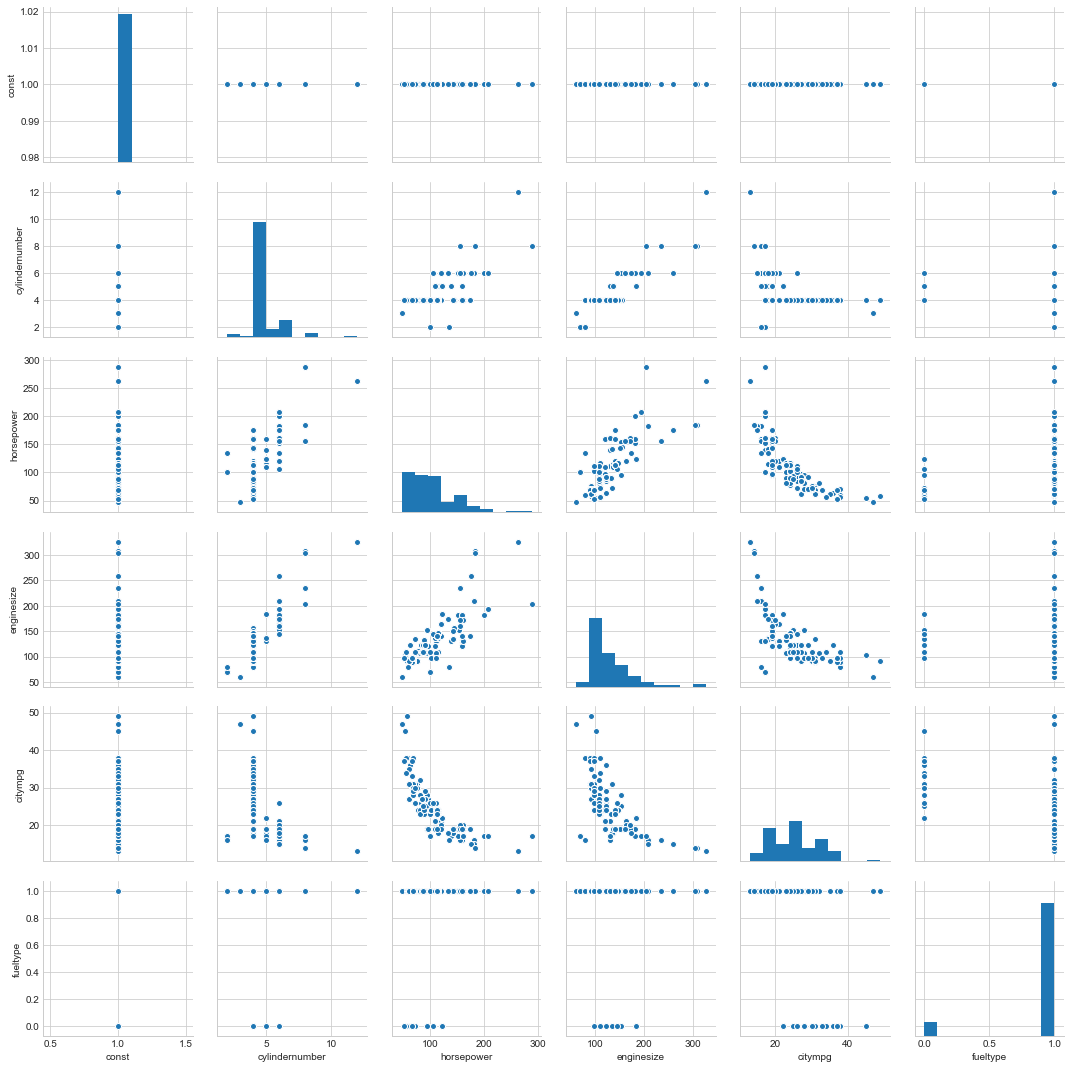

In [102]:
# Revisualize the data
sns.pairplot(X)
plt.figure(figsize=(90,50))
plt.show()

# Residual Analysis on final model

In [103]:
y_train_price = lm_10.predict(X)

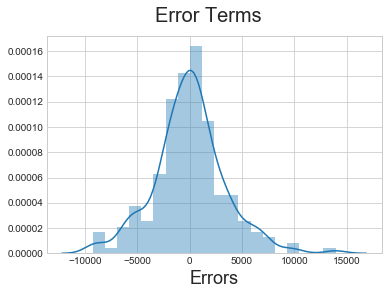

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [105]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [106]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["fueltype"], axis = 1)



In [107]:
# Making predictions using the fourth model

y_pred_m4 = lm_10.predict(X)

# Plotting the Actual and Predicated 

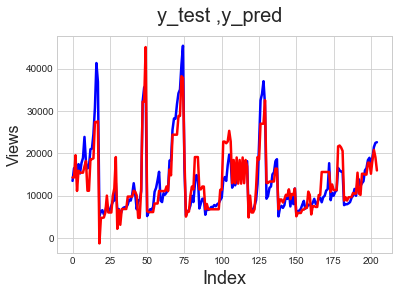

In [109]:
#Actual vs Predicted
fig = plt.figure()
plt.plot(carprice.price, color="blue", linewidth=2.5, linestyle="-")
plt.plot(predicated_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('y_test ,y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)   
plt.show()